In [13]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from statsmodels.graphics.tsaplots import plot_acf

# Set plot styling
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [14]:
tickers = [
    'AAL'	
    ,'ALGT'
    ,'ALK'	
    ,'DAL'	
    ,'ITA'	
    ,'IYT'	
    ,'JBLU'	
    ,'JETS'	
    ,'LUV'	
    ,'UAL'
]

In [15]:
# Load the stock price data
data_path = Path("../../Data/Processed/stock_data.pkl")

try:
    with open(data_path, 'rb') as f:
        stock_data = pickle.load(f)
    print(f"Successfully loaded data from {data_path}")
except Exception as e:
    print(f"Error loading data: {e}")

Successfully loaded data from ..\..\Data\Processed\stock_data.pkl


In [16]:
# Let's examine the data structure
print(f"Data shape: {stock_data.shape}")
print(f"\nFirst few rows:")
stock_data.head()

Data shape: (48280, 540)

First few rows:


,AAL_%Chg,ALGT_%Chg,ALK_%Chg,DAL_%Chg,ITA_%Chg,IYT_%Chg,JBLU_%Chg,JETS_%Chg,LUV_%Chg,UAL_%Chg,...,AAL_Volume,ALGT_Volume,ALK_Volume,DAL_Volume,ITA_Volume,IYT_Volume,JBLU_Volume,JETS_Volume,LUV_Volume,UAL_Volume
Time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:30:00,0.13,0.52,1.31,0.31,0.08,0.80,0.13,0.68,0.49,0.43,...,181986.0,3789.0,47871.0,344480.0,28244.0,14312.0,293572.0,1448.0,224948.0,116039.0
2018-01-02 09:45:00,0.19,-0.88,0.05,-0.13,-0.12,0.07,-0.25,-0.04,0.43,-0.25,...,175661.0,1500.0,78358.0,263594.0,9632.0,7840.0,121302.0,302.0,208563.0,130163.0
2018-01-02 10:00:00,-0.08,1.09,0.18,0.22,0.17,0.23,0.27,0.32,-0.18,0.13,...,102270.0,7577.0,33292.0,219949.0,12906.0,14784.0,103446.0,500.0,135579.0,63010.0
2018-01-02 10:15:00,0.02,-0.03,0.20,0.03,-0.16,-0.29,-0.38,-0.01,-0.27,0.28,...,97181.0,7400.0,48838.0,122923.0,7462.0,8600.0,59784.0,300.0,87538.0,101656.0
2018-01-02 10:30:00,0.04,-0.74,0.05,0.30,-0.18,-0.09,-0.04,-0.08,0.30,0.24,...,112874.0,7972.0,44382.0,216575.0,11720.0,18240.0,56808.0,805.0,127150.0,63372.0


In [17]:
# Display basic information about the dataset
print(f"Date range: {stock_data.index.min()} to {stock_data.index.max()}")

# Check for missing values
na_counts = stock_data.isna().sum()
print(f"\nMissing values per stock:")
print(na_counts[na_counts > 0] if na_counts.sum() > 0 else "No missing values")

Date range: 2018-01-02 09:30:00 to 2025-05-30 15:45:00

Missing values per stock:
No missing values


## Calculating Daily Returns

To analyze correlations, we'll calculate the percentage change in stock prices (daily returns) rather than using the absolute prices. This gives us a better measure of how stock price movements correlate with each other.

## Correlation Analysis

Now we'll compute and visualize the correlation matrix between stock returns. The correlation coefficient ranges from -1 to 1:

- +1 indicates perfect positive correlation (stocks move exactly together)
- 0 indicates no correlation (stocks move independently)
- -1 indicates perfect negative correlation (stocks move exactly opposite)

In [18]:
# New dataframe which is all columns with '%Chg' suffix
returns = stock_data.filter(like='Change')

# Rename the columns to remove the '%Chg' suffix
returns.columns = returns.columns.str.replace('_Change', '', regex=False)

# Compute correlation matrix of daily returns
correlation_matrix = returns.corr()

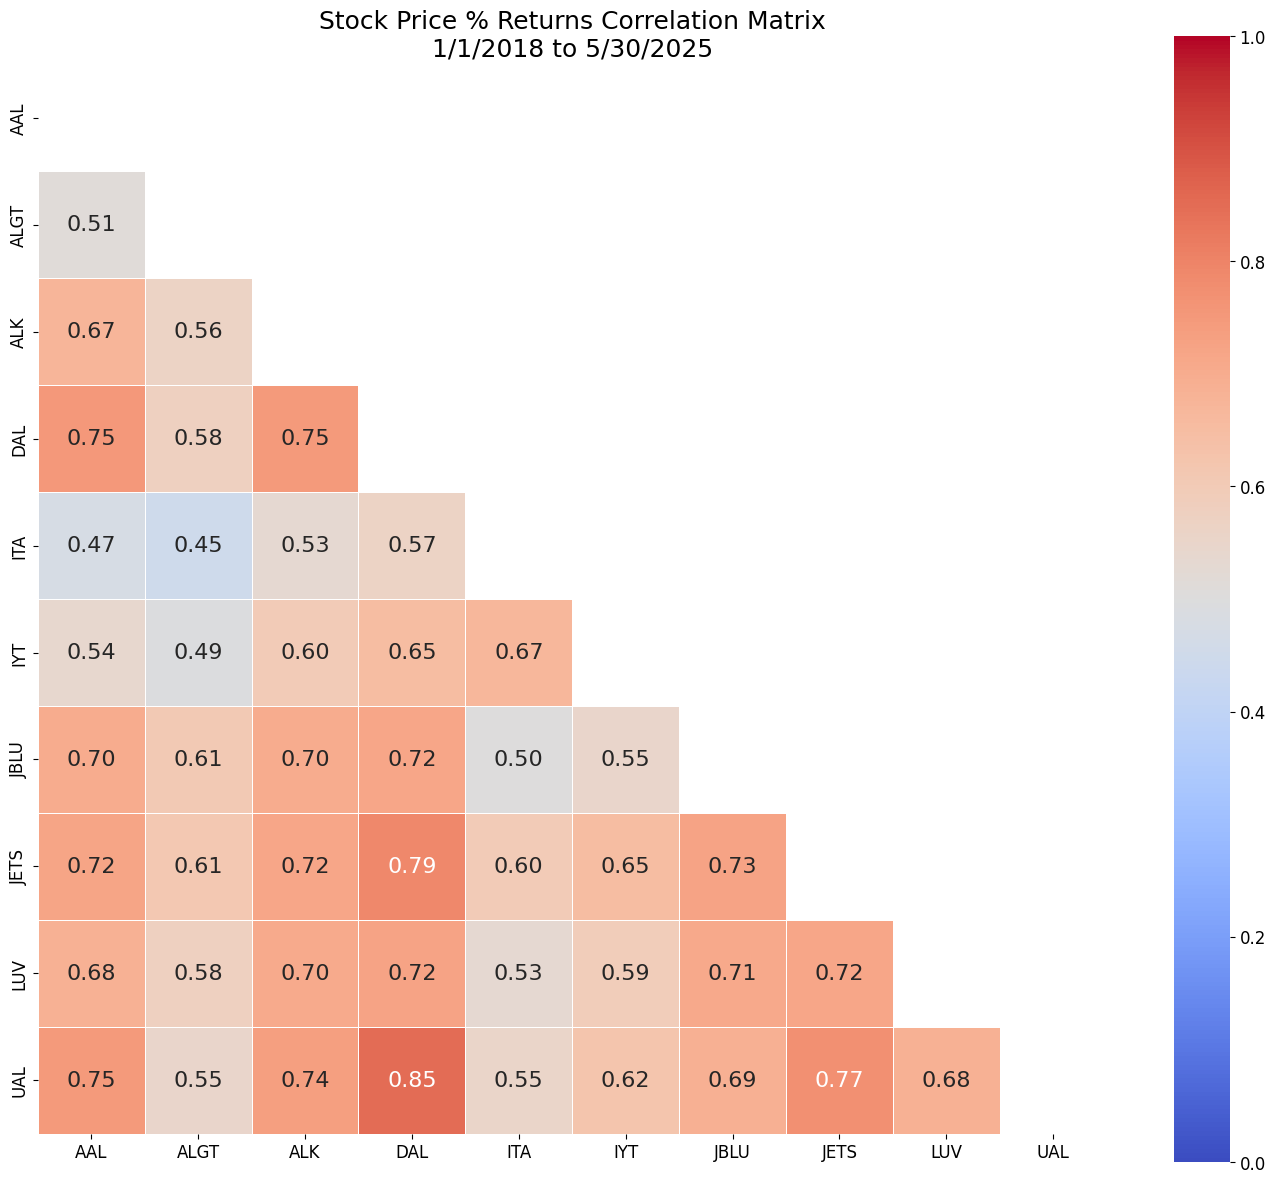

In [19]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap with annotations (lower triangle only)
sns.heatmap(
    correlation_matrix, 
    mask=mask,
    annot=True, 
    cmap='coolwarm', 
    vmin=0, 
    vmax=1, 
    fmt='.2f',
    linewidths=0.5,
    square=True,
    annot_kws={'size': 16}
)

plt.title('Stock Price % Returns Correlation Matrix\n1/1/2018 to 5/30/2025', fontsize=18)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

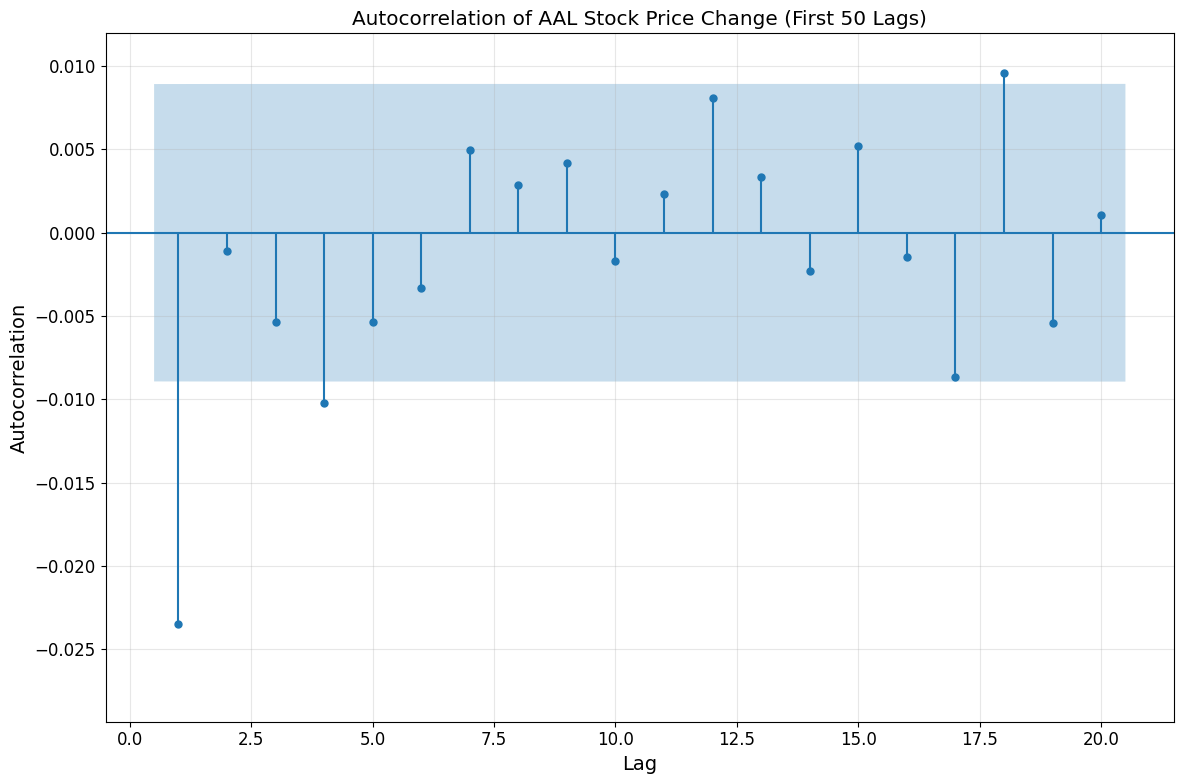

In [20]:
# Plot autocorrelation for AAL stock for the first 50 lags
plt.figure(figsize=(14, 8))

# Create a clean autocorrelation plot without confidence intervals
plot_acf(returns['AAL'].dropna(), 
         lags=20, 
         alpha=0.05, 
         title=f'Autocorrelation of AAL Stock Price Change (First 50 Lags)',
         zero=False,
         auto_ylims=True)

# Enhance plot appearance
plt.xlabel('Lag', fontsize=14)
plt.ylabel('Autocorrelation', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

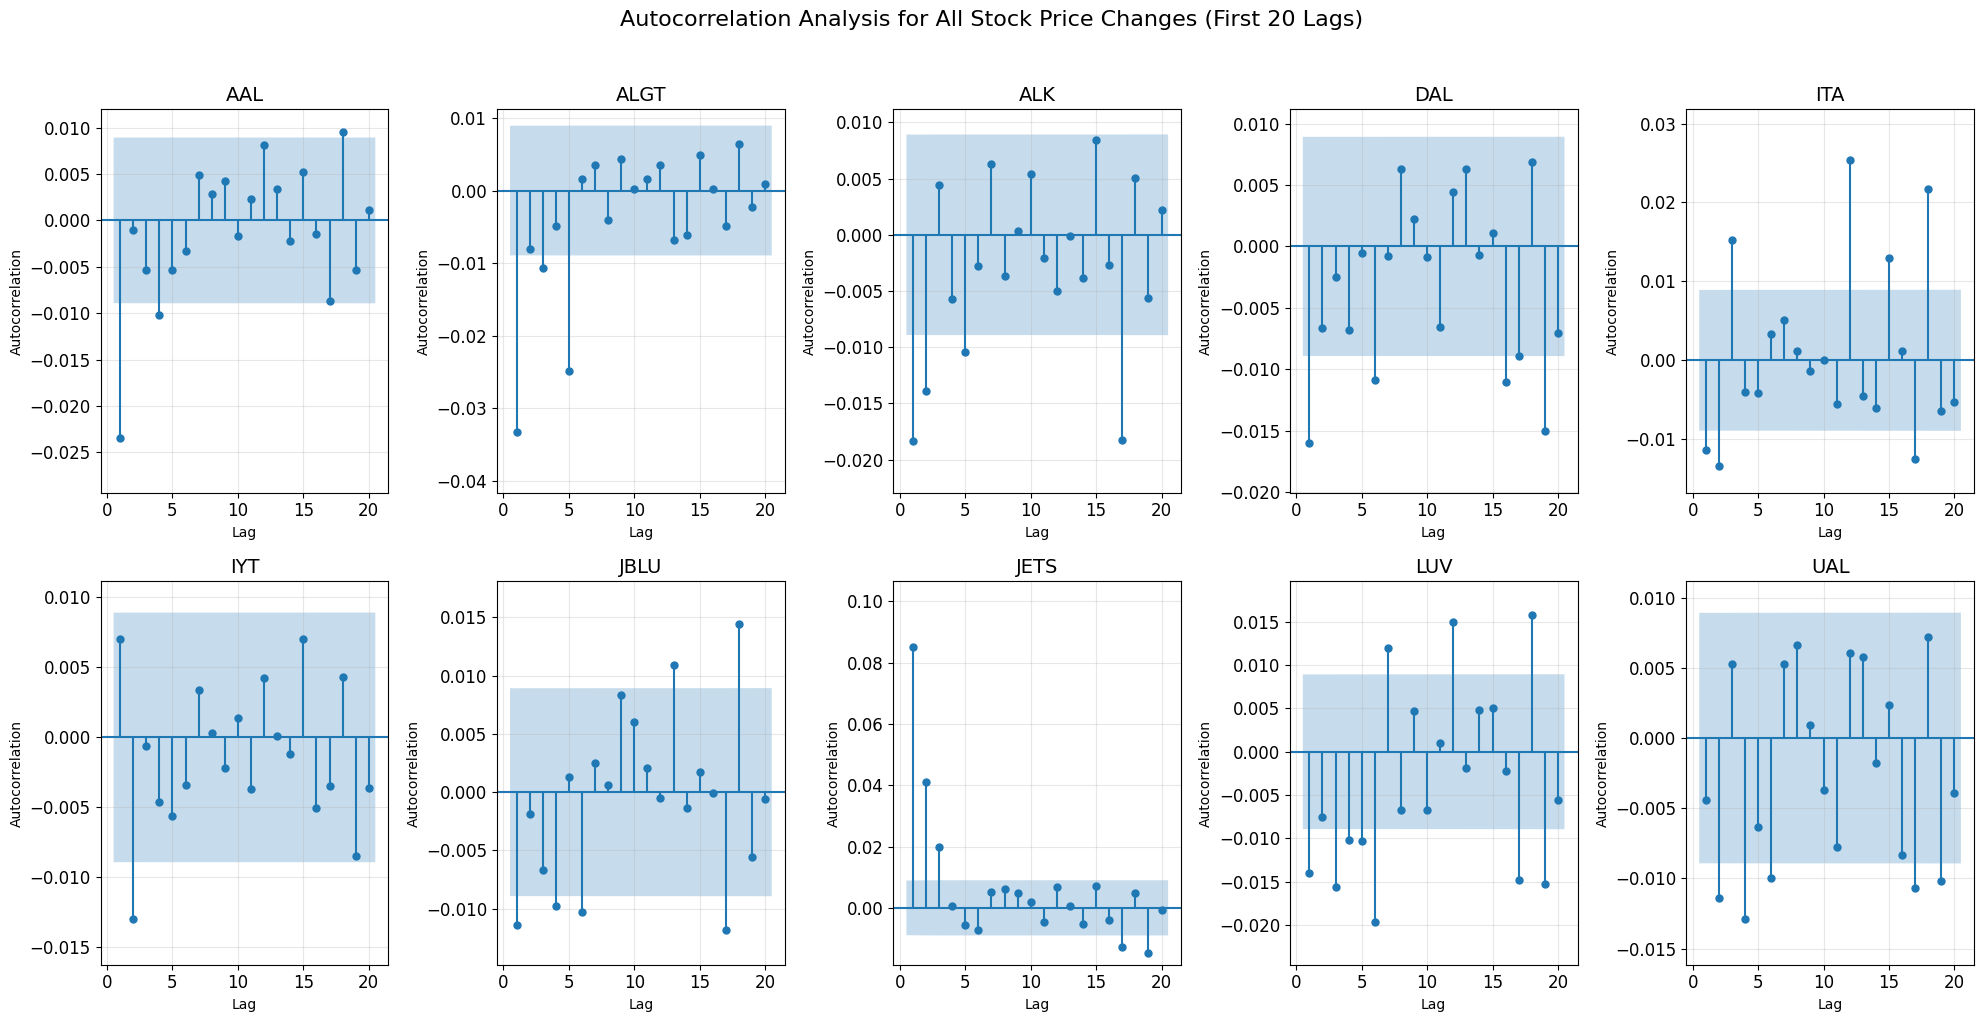

In [21]:
# Create a matrix of autocorrelation plots for all tickers
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    # Plot autocorrelation for each ticker
    plot_acf(returns[ticker].dropna(), 
             lags=20, 
             alpha=0.05, 
             title=f'{ticker} Autocorrelation',
             zero=False,
             auto_ylims=True,
             ax=axes[i])
    
    # Customize each subplot
    axes[i].set_xlabel('Lag', fontsize=10)
    axes[i].set_ylabel('Autocorrelation', fontsize=10)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_title(f'{ticker}', fontsize=14)

plt.suptitle('Autocorrelation Analysis for All Stock Price Changes (First 20 Lags)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [36]:
# Let's check the structure of the datetime index
print("Index type:", type(stock_data.index))
print("\nSample of index values:")
print(stock_data.index[:5])

# Check if we have 15-minute increments
print("\nTime differences between consecutive rows:")
print(stock_data.index.to_series().diff().value_counts().head())

Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

Sample of index values:
DatetimeIndex(['2018-01-02 09:30:00', '2018-01-02 09:45:00',
               '2018-01-02 10:00:00', '2018-01-02 10:15:00',
               '2018-01-02 10:30:00'],
              dtype='datetime64[ns]', name='Time', freq=None)

Time differences between consecutive rows:
Time
0 days 00:15:00    46410
0 days 17:45:00     1456
2 days 17:45:00      328
3 days 17:45:00       50
1 days 17:45:00       13
Name: count, dtype: int64


## Intraday Seasonality Analysis

Stock returns often exhibit intraday patterns or 'seasonality' where certain times of the day consistently show different behavior. For example, market open and close often have higher volatility.

Below, we'll analyze the intraday seasonality pattern for AAL stock by:

1. Extracting the time of day from the datetime index
2. Grouping returns by time of day
3. Calculating statistics (mean and interquartile range) for each time period
4. Visualizing the patterns to identify any recurring intraday trends

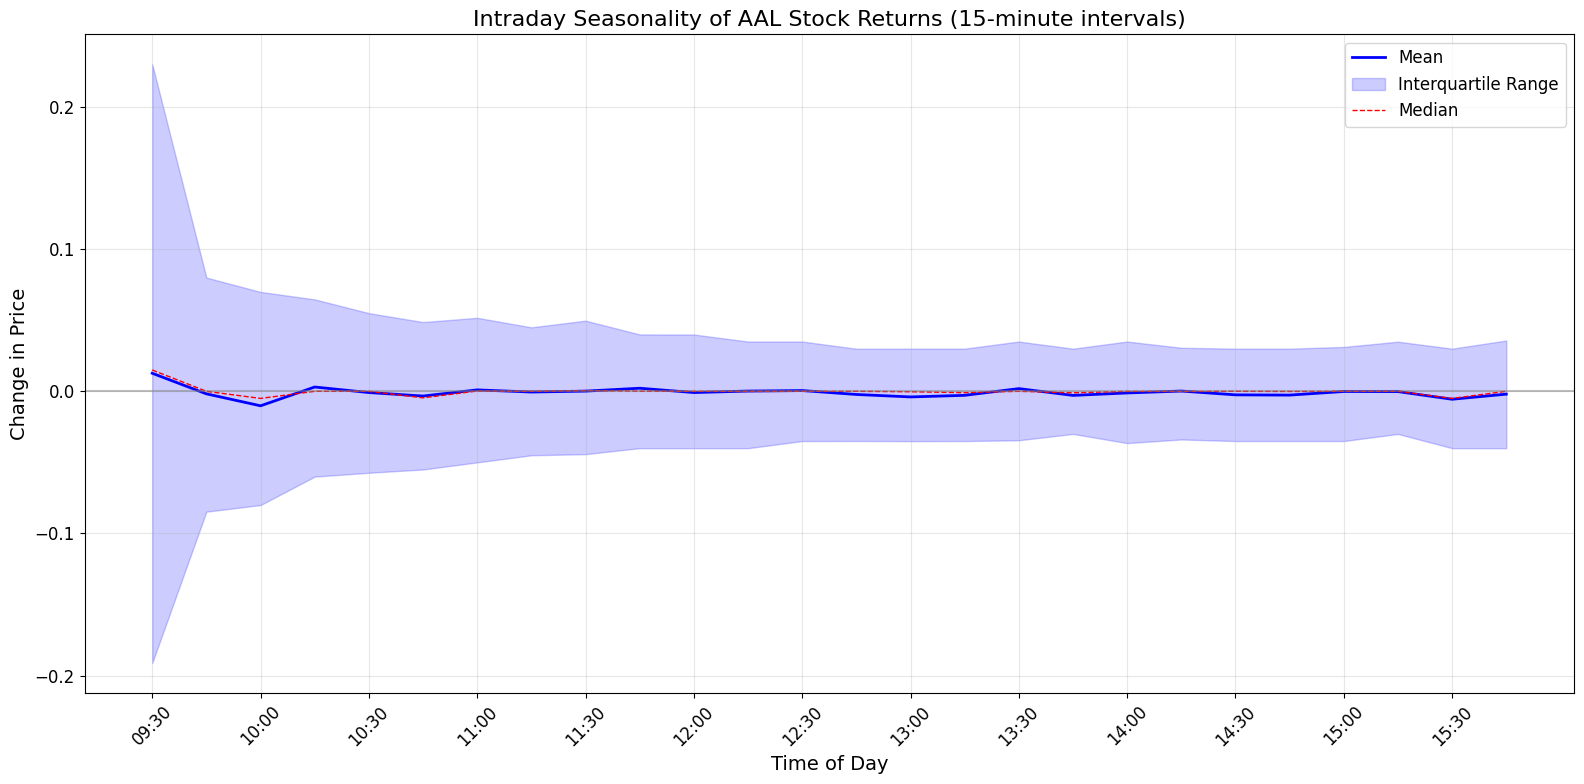

Seasonality Statistics for Key Time Periods:
------------------------------------------------------------
  Time   |    Mean    |   Median   |    Q25     |    Q75     | IQR Width 
------------------------------------------------------------
 09:30   |   0.012703 |   0.015000 |  -0.191100 |   0.230000 |   0.421100
 12:00   |  -0.000874 |   0.000000 |  -0.040000 |   0.039950 |   0.079950
 15:45   |  -0.001996 |   0.000000 |  -0.040000 |   0.035725 |   0.075725

Highest Average Returns:
   time_of_day      mean
0        09:30  0.012703
3        10:15  0.003021
9        11:45  0.002162
16       13:30  0.001893
6        11:00  0.000992

Lowest Average Returns:
   time_of_day      mean
2        10:00 -0.010196
24       15:30 -0.005591
14       13:00 -0.003958
5        10:45 -0.003328
17       13:45 -0.002884

Highest Return Variability (IQR Width):
  time_of_day  iqr_width
0       09:30    0.42110
1       09:45    0.16465
2       10:00    0.14990
3       10:15    0.12465
4       10:30    0.1

In [23]:
# Create a dataframe with AAL returns
aal_returns = pd.DataFrame({
    'returns': stock_data.filter(like='AAL_Change').iloc[:, 0]
})

# Extract time of day from the index
aal_returns['time_of_day'] = aal_returns.index.strftime('%H:%M')

# Group by time of day and calculate statistics
time_stats = aal_returns.groupby('time_of_day')['returns'].agg([
    ('mean', 'mean'),
    ('median', 'median'),
    ('q25', lambda x: x.quantile(0.25)),
    ('q75', lambda x: x.quantile(0.75))
]).reset_index()

# Sort by time of day
time_stats['time_obj'] = pd.to_datetime(time_stats['time_of_day'], format='%H:%M').dt.time
time_stats = time_stats.sort_values('time_obj')

# Create the seasonality plot
plt.figure(figsize=(16, 8))

# Plot the mean
plt.plot(time_stats['time_of_day'], time_stats['mean'], 'b-', linewidth=2, label='Mean')

# Plot the interquartile range as a shaded area
plt.fill_between(
    time_stats['time_of_day'], 
    time_stats['q25'], 
    time_stats['q75'], 
    color='blue', 
    alpha=0.2, 
    label='Interquartile Range'
)

# Add median line
plt.plot(time_stats['time_of_day'], time_stats['median'], 'r--', linewidth=1, label='Median')

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Format the plot
plt.title('Intraday Seasonality of AAL Stock Returns (15-minute intervals)', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Change in Price', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()

# Only show every other x-tick to avoid crowding
plt.xticks(time_stats['time_of_day'][::2])
plt.tight_layout()
plt.show()

# Display summary statistics for specific times of day
def highlight_time_periods(time_stats, periods):
    """Display statistics for specific time periods of interest"""
    print("Seasonality Statistics for Key Time Periods:")
    print("-" * 60)
    print(f"{'Time':^8} | {'Mean':^10} | {'Median':^10} | {'Q25':^10} | {'Q75':^10} | {'IQR Width':^10}")
    print("-" * 60)
    
    for period in periods:
        row = time_stats[time_stats['time_of_day'] == period]
        if not row.empty:
            iqr_width = row['q75'].values[0] - row['q25'].values[0]
            print(f"{period:^8} | {row['mean'].values[0]:10.6f} | {row['median'].values[0]:10.6f} | "
                  f"{row['q25'].values[0]:10.6f} | {row['q75'].values[0]:10.6f} | {iqr_width:10.6f}")

# Key time periods (market open, midday, market close)
key_periods = ['09:30', '12:00', '15:45']
highlight_time_periods(time_stats, key_periods)

# Show times with highest and lowest average returns
print("\nHighest Average Returns:")
print(time_stats.sort_values('mean', ascending=False).head(5)[['time_of_day', 'mean']])

print("\nLowest Average Returns:")
print(time_stats.sort_values('mean').head(5)[['time_of_day', 'mean']])

# Show times with highest variability (widest IQR)
time_stats['iqr_width'] = time_stats['q75'] - time_stats['q25']
print("\nHighest Return Variability (IQR Width):")
print(time_stats.sort_values('iqr_width', ascending=False).head(5)[['time_of_day', 'iqr_width']])